In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
bank=pd.read_csv("bank-full.csv",sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='y', ylabel='age'>

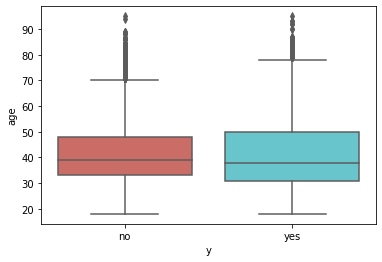

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.boxplot(x='y',y='age',data=bank,palette='hls')


<AxesSubplot:xlabel='y', ylabel='count'>

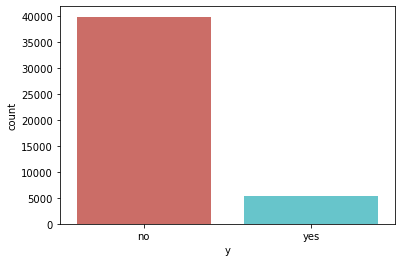

In [7]:
sb.countplot(x='y',data=bank,palette='hls')

<AxesSubplot:xlabel='y'>

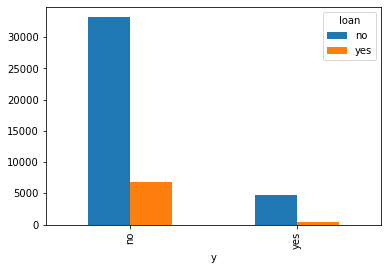

In [8]:
pd.crosstab(bank.y,bank.loan).plot(kind = 'bar')  


<AxesSubplot:xlabel='y'>

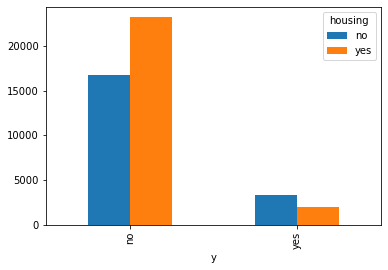

In [9]:
pd.crosstab(bank.y,bank.housing).plot(kind = 'bar')

In [10]:
bank.y.replace(('yes','no'),(1,0),inplace = True)

In [11]:
bank.loan.mode()
bank.housing.mode()


0    yes
Name: housing, dtype: object

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Model Building
X = bank.iloc[:,[0,5,9,11,12,13,14]]
Y = bank.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [14]:
bank.shape

(45211, 17)

In [15]:
classifier.coef_

array([[-4.82016421e-02,  3.47719983e-05, -3.54024586e-02,
         3.15544177e-03, -2.43118278e-01,  5.87548184e-04,
         9.18642091e-02]])

In [16]:
classifier.predict_proba (X)


array([[0.91687307, 0.08312693],
       [0.89533039, 0.10466961],
       [0.8645683 , 0.1354317 ],
       ...,
       [0.77410176, 0.22589824],
       [0.94150165, 0.05849835],
       [0.64346273, 0.35653727]])

In [17]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank   

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,0


In [18]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0,0.916873,0.083127
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0,0.895330,0.104670
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0,0.864568,0.135432
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0,0.918774,0.081226
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0,0.812880,0.187120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,0,0.681525,0.318475
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,0,0.956655,0.043345
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,0,0.774102,0.225898
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,0,0.941502,0.058498


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[39252   670]
 [ 4451   838]]


In [20]:
pd.crosstab(y_pred,Y)  

y,0,1
row_0,,
0,39252,4451
1,670,838


In [21]:
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy 

0.8867311052619937

In [22]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score  

0.5708296616102289

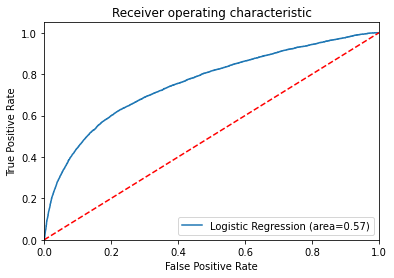

In [24]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [25]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [26]:
y_prob1

,0
0,0.083127
1,0.104670
2,0.135432
3,0.081226
4,0.187120
...,...
45206,0.318475
45207,0.043345
45208,0.225898
45209,0.058498


In [27]:
import statsmodels.api as sm  

In [28]:
logit = sm.Logit(Y,X)

In [29]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.317447
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:                  0.1203
Time:                        20:59:04   Log-Likelihood:                -14352.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0505      0.001    -53.998      0.000      -0.052      -0.049
balance     3.748e-05   4.26e-06      8.791      0.000    2.91e-05    4.58e-05
day           -0.0371      0.002    -20.674      0.000      -0.041      -0.034
duration       0.0031   5.37e-05     57.920      0.000       0.003       0.003
campaign      -0.2404      0.011    -21.969      0.000      -0.262      -0.219
pdays          0.0010      0.000      6.532      0.000       0.001       0.001
previous       0.0853      0.008     11.202      0.000       0.070       0.100
==============================================================================
"""

In [30]:
fpr

array([0.00000000e+00, 2.50488452e-05, 7.51465357e-05, ...,
       9.96994139e-01, 9.96994139e-01, 1.00000000e+00])

In [31]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
606,5.445452e-01,0.887350
607,5.444441e-01,0.887350
605,5.455857e-01,0.887328
608,5.435554e-01,0.887328
610,5.434286e-01,0.887328
...,...,...
8065,1.643733e-04,0.119772
8066,1.610648e-04,0.119750
8067,1.498293e-04,0.119639
8068,1.498159e-04,0.119617


In [33]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.156651


In [36]:
threshold = 0.156651
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds)) 

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     39922
           1       0.27      0.62      0.38      5289

    accuracy                           0.76     45211
   macro avg       0.61      0.70      0.62     45211
weighted avg       0.86      0.76      0.80     45211



In [37]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])